In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import re
% matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
data = pd.read_csv("./DATA/pal-bel-rec.csv")
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera
count,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3.723000e+03,3.723000e+03,3.723000e+03,3723.000000,3723.000000,...,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000,3723.000000
mean,18380.880473,55641.345420,55641.345420,-34.579195,-58.424563,3.632685e+05,5.914885e+06,3.352254e+05,110.440236,97.807951,...,0.211657,0.132689,0.118184,0.226162,0.140210,0.107709,0.186946,0.096428,0.178082,0.403169
std,11690.483710,33092.112741,33092.112741,0.013016,0.022606,4.587917e+05,5.497961e+06,3.115963e+05,96.497022,84.397246,...,0.408538,0.339284,0.322870,0.418401,0.347251,0.310054,0.389921,0.295216,0.382633,0.490600
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,4.900000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8613.500000,28841.500000,28841.500000,-34.589955,-58.440345,1.490000e+05,2.558452e+06,1.450000e+05,48.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16800.000000,52039.000000,52039.000000,-34.581963,-58.423297,2.478000e+05,4.234680e+06,2.400000e+05,81.000000,71.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26597.000000,77604.000000,77604.000000,-34.567117,-58.404614,4.150000e+05,7.056518e+06,3.999273e+05,137.000000,122.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.546880,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,967.000000,967.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Dummies con los 3 barrios
series = data['BARRIO']
dummies = pd.get_dummies(series, prefix='BARRIO',drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,index_right,BARRIO,Unnamed: 0,ID,TIPO_PROPIEDAD,lat-lon,latitud,longitud,price,currency,...,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,geometry,BARRIO_PALERMO,BARRIO_RECOLETA
0,17046,PALERMO,53051,53051,apartment,"-34.578631,-58.4046973",-34.578631,-58.404697,125000.0,USD,...,0,0,0,0,0,0,0,POINT (-58.4046973 -34.578631),1,0
1,4864,PALERMO,17288,17288,apartment,"-34.5786231,-58.406939",-34.578623,-58.406939,1700000.0,USD,...,0,0,0,0,0,0,1,POINT (-58.406939 -34.5786231),1,0
2,13943,PALERMO,43955,43955,apartment,"-34.5785701327,-58.4046927983",-34.578570,-58.404693,960000.0,USD,...,0,0,0,0,0,0,1,POINT (-58.4046927983 -34.5785701327),1,0
3,6922,PALERMO,22867,22867,apartment,"-34.5785431,-58.4071007",-34.578543,-58.407101,780000.0,USD,...,0,0,0,0,0,0,1,POINT (-58.4071007 -34.5785431),1,0
4,18983,PALERMO,57911,57911,apartment,"-34.578518,-58.404894",-34.578518,-58.404894,275000.0,USD,...,0,0,0,0,0,0,1,POINT (-58.40489399999999 -34.578518),1,0


In [4]:
data = data[(data['TIPO_PROPIEDAD'] == 'apartment')]
#3417 registros

In [5]:
pd.set_option('display.max_columns', 500)
data.describe()

,index_right,Unnamed: 0,ID,latitud,longitud,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,BARRIO_PALERMO,BARRIO_RECOLETA
count,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3.417000e+03,3.417000e+03,3.417000e+03,3417.000000,3417.000000,3417.000000,3417.000000,235.000000,2169.000000,1136.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000,3417.000000
mean,18439.486099,55806.441323,55806.441323,-34.579069,-58.424159,3.502808e+05,5.673386e+06,3.215385e+05,102.475856,91.447761,3121.989675,4071.945592,4.570213,3.108806,5083.559859,1.730465,0.220369,0.144279,0.127597,0.241147,0.149839,0.115013,0.180568,0.101551,0.184080,0.417618,0.455956,0.320749
std,11716.451431,33160.612485,33160.612485,0.012977,0.022723,4.431546e+05,5.094188e+06,2.887125e+05,80.603353,71.716490,780.645209,5688.043453,3.935154,1.552632,4769.690811,1.597968,0.414556,0.351423,0.333690,0.427842,0.356966,0.319085,0.384716,0.302101,0.387606,0.493239,0.498129,0.466833
min,4.000000,7.000000,7.000000,-34.599730,-58.472364,5.800000e+04,5.898837e+05,3.343159e+04,21.000000,21.000000,1078.438387,1196.319018,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8607.000000,28825.000000,28825.000000,-34.589880,-58.440432,1.450000e+05,2.523164e+06,1.430000e+05,46.000000,42.000000,2590.909091,2857.142857,2.000000,2.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16984.000000,52793.000000,52793.000000,-34.581818,-58.423297,2.400000e+05,4.181746e+06,2.370000e+05,78.000000,70.000000,3000.000000,3329.166667,4.000000,3.000000,3500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26639.000000,77755.000000,77755.000000,-34.566941,-58.404093,3.990000e+05,6.881355e+06,3.900000e+05,130.000000,117.000000,3532.467532,4032.258065,6.000000,4.000000,6500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,40565.000000,121158.000000,121158.000000,-34.549922,-58.384171,9.435376e+06,5.646240e+07,3.200000e+06,789.000000,690.000000,5487.804878,101851.557143,22.000000,15.000000,54240.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data_aux = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_aux, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 17) (2391,)
(1026, 17) (1026,)


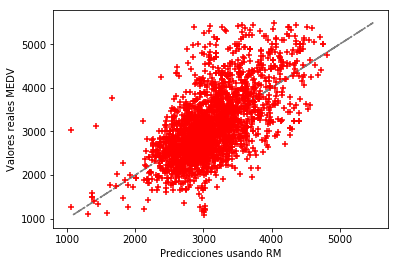

EMC: 359334.33581567777
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     92.55
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          6.98e-247
Time:                        21:01:33   Log-Likelihood:                -18686.
No. Observations:                2391   AIC:                         3.741e+04
Df Residuals:                    2373   BIC:                         3.751e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [8]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

In [9]:
data_e = X_train
data_e['error'] = y_train - predictions
data_e['error_abs'] = np.abs(y_train - predictions)
data_e['precioxm2'] = y_train
data_e['pred'] = predictions
data_e.sort_values(by='error_abs',ascending=False).head(50)

,const,surface_total_in_m2,surface_covered_in_m2,Ambientes,pileta,amenities,gimnasio,laundry,sum,solarium,parrilla,a estrenar,subte,cochera,latitud,longitud,BARRIO_PALERMO,BARRIO_RECOLETA,error,error_abs,precioxm2,pred
221,1.0,529.0,431.0,0,0,0,0,0,0,0,0,0,0,1,-34.583042,-58.400016,1,0,2529.667335,2529.667335,5387.523629,2857.856294
454,1.0,120.0,110.0,0,0,0,0,0,0,0,0,0,0,0,-34.586167,-58.408298,1,0,2317.336913,2317.336913,5416.666667,3099.329754
1232,1.0,56.0,51.0,2,0,0,0,0,0,0,0,0,0,0,-34.577761,-58.424323,1,0,2255.657618,2255.657618,5267.857143,3012.199524
2857,1.0,330.0,300.0,0,0,0,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,1,2221.274255,2221.274255,5303.030303,3081.756048
3193,1.0,43.0,40.0,2,0,0,0,0,0,0,0,0,0,0,-34.590962,-58.406078,0,1,2128.689560,2128.689560,4883.720930,2755.031370
3003,1.0,342.0,298.0,5,0,0,0,0,0,0,0,0,0,1,-34.589546,-58.397364,0,1,2123.728011,2123.728011,4970.760234,2847.032223
804,1.0,130.0,130.0,0,0,0,0,0,0,0,0,0,0,0,-34.563342,-58.436630,1,0,2107.754696,2107.754696,5384.615385,3276.860688
2423,1.0,340.0,222.0,4,1,0,0,0,0,0,1,0,0,1,-34.571696,-58.467681,0,0,2105.388126,2105.388126,3764.705882,1659.317756
2936,1.0,80.0,69.0,3,0,0,0,0,0,0,0,1,0,0,-34.589652,-58.406289,0,1,2079.484077,2079.484077,5000.000000,2920.515923
1227,1.0,114.0,100.0,0,0,0,0,1,0,1,0,0,0,0,-34.577777,-58.424300,1,0,2026.044006,2026.044006,5175.438596,3149.394591


In [29]:
se = StandardScaler()

In [31]:
X_train_s = se.fit_transform(X_train)
X_test_s = se.transform(X_test)

ValueError: operands could not be broadcast together with shapes (1026,15) (16,) (1026,15) 

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print ('Regresión Mínimos Cuadrados Ordinarios')
#Coeficiente
print('Coeficientes:',regr.coef_)
# MSE 
print("Residual sum of squares: %.2f"
 % np.mean((regr.predict(X_train) - y_train) ** 2))
# Varianza explicada
print('Varianza explicada: %.2f\n' % regr.score(X_train, y_train))

In [ ]:
regr2=linear_model.LassoCV(cv=10).fit(X_train_s, y_train)

print ('Regresión Lasso' )
# Coeficiente
print ('Coeficientes:', regr2.coef_)
# MSE
print("Residual sum of squares: %.2f"
 % np.mean((regr2.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('Varianza explicada: %.2f\n' % regr2.score(X_train_s, y_train))

In [ ]:
regr3=linear_model.RidgeCV(alphas=[0.1,0.2,0.5,0.7,1.0,1.5,3.0,5.0,7.0,10.0])
regr3.fit(X_train_s,y_train)

print ('Regresión Ridge')
# Coeficientes
print('Coeficientes:', regr3.coef_)
# MSE
print("Residual sum of squares: %.2f"
 % np.mean((regr3.predict(X_train_s) - y_train) ** 2))
# Varianza Explicada
print('Varianza explicada: %.2f\n' % regr3.score(X_train_s, y_train))

In [ ]:
print('Varianza explicada: %.2f\n' % regr.score(X_test, y_test))

In [ ]:
data_e.describe()

In [13]:
data['todo'] = data['pileta'] +  data['amenities'] + data['gimnasio'] + data['laundry'] + data['sum'] 
+ data['solarium'] + data['parrilla'] + data['cochera']

0       0
1       1
2       1
3       1
4       1
5       1
6       1
7       0
8       0
9       1
10      1
12      0
13      1
14      1
15      2
16      0
17      1
18      3
19      0
20      1
21      0
22      1
23      0
24      1
25      0
26      0
27      1
28      0
29      0
30      1
       ..
3691    0
3692    0
3693    0
3694    0
3695    0
3696    0
3697    0
3698    0
3699    0
3700    0
3701    0
3702    0
3703    0
3704    0
3705    0
3706    0
3707    0
3710    1
3711    0
3712    0
3713    1
3714    0
3715    0
3716    0
3717    0
3718    0
3719    0
3720    0
3721    0
3722    0
Length: 3417, dtype: int64

In [17]:
data_aux2 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta', 'amenities',
       'gimnasio', 'laundry', 'sum', 'solarium', 'parrilla', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'BARRIO_RECOLETA', 'todo']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data_aux2, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 18) (2391,)
(1026, 18) (1026,)


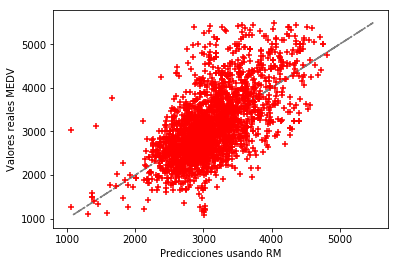

EMC: 359334.33581567876
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     92.55
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          6.98e-247
Time:                        21:02:49   Log-Likelihood:                -18686.
No. Observations:                2391   AIC:                         3.741e+04
Df Residuals:                    2373   BIC:                         3.751e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [19]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

In [26]:
data_aux3 = data[[ 'surface_total_in_m2', 'surface_covered_in_m2' ,'Ambientes', 'pileta',
       'gimnasio', 'laundry', 'sum', 'solarium', 'a estrenar',
       'subte', 'cochera', 'latitud', 'longitud', 'BARRIO_PALERMO', 'todo']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data_aux3, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 15) (2391,)
(1026, 15) (1026,)


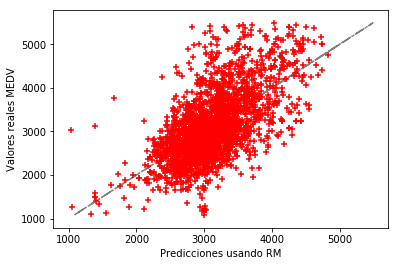

EMC: 359530.94036252244
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     104.8
Date:                Thu, 27 Sep 2018   Prob (F-statistic):          1.27e-248
Time:                        21:04:04   Log-Likelihood:                -18686.
No. Observations:                2391   AIC:                         3.740e+04
Df Residuals:                    2375   BIC:                         3.750e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const 

In [28]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())

In [14]:
data_aux4 = data[[ 'surface_total_in_m2', 'Ambientes',  'todo']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_aux4, data.price_usd_per_m2, test_size=0.3, random_state=53)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2391, 3) (2391,)
(1026, 3) (1026,)


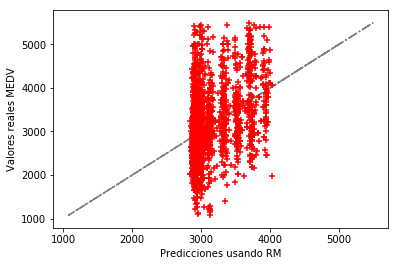

EMC: 507111.49616849516
                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     141.9
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           1.27e-84
Time:                        21:02:23   Log-Likelihood:                -19097.
No. Observations:                2391   AIC:                         3.820e+04
Df Residuals:                    2387   BIC:                         3.823e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const     

In [16]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)

# Graficamos los resultados
plt.plot(y_train,y_train, '-.', c='grey')
plt.scatter(predictions, y_train, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones usando RM")
plt.ylabel("Valores reales MEDV")
plt.show()

# Imprimimos el MSE y un resumen del modelo
print ("EMC:", mean_squared_error(y_train, predictions))
print (model.summary())